In [ ]:
# 📝 Handling Missing Data - Titanic Dataset
# ==================================================
# This notebook explores different missing data handling methods
# and compares their impact on downstream classification performance.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load Dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Dataset loaded. Shape:", df.shape)
df.head()

# Initial Exploration
print("\nMissing Values Summary:")
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

# Basic Preprocessing
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Imputation Strategies
# Median Imputation
median_age = df['Age'].median()
df_median = df.copy()
df_median['Age'].fillna(median_age, inplace=True)
df_median['Embarked'].fillna(df_median['Embarked'].mode()[0], inplace=True)
if 'Cabin' in df_median.columns:
    df_median.drop(columns=['Cabin'], inplace=True)

# KNN Imputation
df_knn = df.copy()
df_knn['Embarked'].fillna(df_knn['Embarked'].mode()[0], inplace=True)
if 'Cabin' in df_knn.columns:
    df_knn.drop(columns=['Cabin'], inplace=True)

imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

# Regression Imputation
df_reg = df.copy()
if 'Cabin' in df_reg.columns:
    df_reg.drop(columns=['Cabin'], inplace=True)
df_reg['Embarked'].fillna(df_reg['Embarked'].mode()[0], inplace=True)

age_train = df_reg[df_reg['Age'].notnull()]
age_test = df_reg[df_reg['Age'].isnull()]

X_train = age_train.drop(columns=['Age', 'Name', 'Ticket'])
y_train = age_train['Age']
X_test = age_test.drop(columns=['Age', 'Name', 'Ticket'])

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
df_reg.loc[df_reg['Age'].isnull(), 'Age'] = y_pred

# Modeling Function
def train_and_evaluate(dataframe, label='Survived'):
    df_model = dataframe.copy()
    df_model.drop(columns=['Name', 'Ticket'], inplace=True)
    X = df_model.drop(columns=[label])
    y = df_model[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

acc_median = train_and_evaluate(df_median)
acc_knn = train_and_evaluate(df_knn_imputed)
acc_reg = train_and_evaluate(df_reg)

print("\nModel Accuracies:")
print(f"Median Imputation: {acc_median:.3f}")
print(f"KNN Imputation: {acc_knn:.3f}")
print(f"Regression Imputation: {acc_reg:.3f}")

plt.bar(['Median', 'KNN', 'Regression'], [acc_median, acc_knn, acc_reg])
plt.ylabel('Accuracy')
plt.title('Model Performance by Imputation Method')
plt.ylim(0,1)
plt.show()


In [1]:
# 📝 Handling Missing Data - Titanic Dataset
# ==================================================
# This notebook explores different missing data handling methods
# and compares their impact on downstream classification performance.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load Dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Missing Values Summary:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


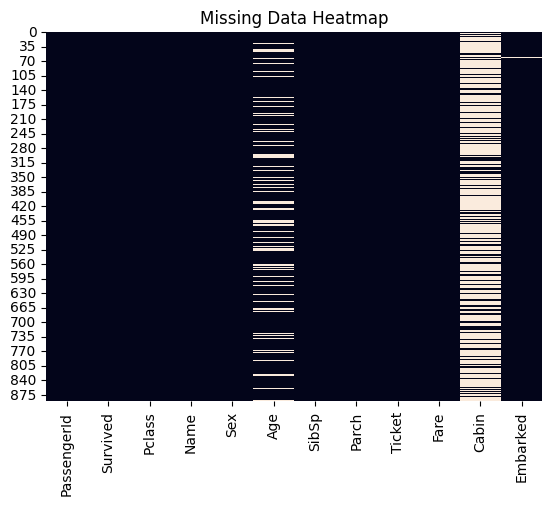

In [3]:
# Initial Exploration
print("\nMissing Values Summary:")
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()


In [4]:
# Basic Preprocessing
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Imputation Strategies

In [6]:
# Median Imputation
median_age = df['Age'].median()
df_median = df.copy()
df_median['Age'].fillna(median_age, inplace=True)
df_median['Embarked'].fillna(df_median['Embarked'].mode()[0], inplace=True)
if 'Cabin' in df_median.columns:
    df_median.drop(columns=['Cabin'], inplace=True)

/tmp/ipython-input-127924194.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-127924194.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [8]:
# --- b. KNN Imputation for Age ---
df_knn = df.copy()

# Fill Embarked mode properly without inplace warning
df_knn['Embarked'] = df_knn['Embarked'].fillna(df_knn['Embarked'].mode()[0])

# Drop non-numeric or irrelevant columns for KNN
cols_to_drop = ['Name', 'Ticket', 'Cabin']  # Cabin may not exist but drop safely
df_knn = df_knn.drop(columns=[c for c in cols_to_drop if c in df_knn.columns])

# Ensure all remaining columns are numeric
imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)


In [11]:
def train_and_evaluate(dataframe, label='Survived'):
    df_model = dataframe.copy()
    # Drop non-predictive columns if they exist
    cols_to_drop = ['Name', 'Ticket']
    df_model = df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns], errors='ignore')

    X = df_model.drop(columns=[label])
    y = df_model[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [13]:
# --- c. Regression Imputation for Age ---
df_reg = df.copy()
# Drop Cabin and Embarked NaNs
if 'Cabin' in df_reg.columns:
    df_reg.drop(columns=['Cabin'], inplace=True)
df_reg['Embarked'].fillna(df_reg['Embarked'].mode()[0], inplace=True)

# Train regression on known Age
age_train = df_reg[df_reg['Age'].notnull()]
age_test = df_reg[df_reg['Age'].isnull()]

X_train = age_train.drop(columns=['Age', 'Name', 'Ticket'])
y_train = age_train['Age']
X_test = age_test.drop(columns=['Age', 'Name', 'Ticket'])

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
df_reg.loc[df_reg['Age'].isnull(), 'Age'] = y_pred


/tmp/ipython-input-2744114059.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reg['Embarked'].fillna(df_reg['Embarked'].mode()[0], inplace=True)


In [14]:
acc_median = train_and_evaluate(df_median)
acc_knn = train_and_evaluate(df_knn_imputed)
acc_reg = train_and_evaluate(df_reg)

print("\nModel Accuracies:")
print(f"Median Imputation: {acc_median:.3f}")
print(f"KNN Imputation: {acc_knn:.3f}")
print(f"Regression Imputation: {acc_reg:.3f}")



Model Accuracies:
Median Imputation: 0.810
KNN Imputation: 0.810
Regression Imputation: 0.827
